In [ ]:
# Execute only once this cell
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install seaborn

In [11]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from array import *
from pickle import dump

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
np.random.seed(123)

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [25]:
FILEPATH = "RiverUK_Dataset.csv"
df = pd.read_csv (FILEPATH, index_col=0)

In [26]:
df.describe()

,X,Y,Depth,ALK_MGL,BOD_MGL,COND_USCM,CUSOL1_MGL,CUSOL2_UGL,DO_MGL,FESOL1_UGL,NO3_N_MGL,NO2_N_MGL,NH4_N_MGL,PH,P_SOL_MGL,SS_MGL,ZN_SOL_UGL
count,141431.000000,141431.000000,141431.0,1.050760e+05,129909.000000,9.538300e+04,59112.000000,18727.000000,130176.000000,18732.000000,130526.000000,131124.000000,138806.000000,133274.000000,132363.000000,107188.000000,18871.000000
mean,278025.884820,371579.178249,0.0,-4.626125e+05,2.178335,-1.772301e+04,0.003225,1.842055,10.327971,389.634305,1.369534,0.023285,0.131473,7.716770,0.096664,8.319009,5.782023
std,41443.173081,31070.510151,0.0,2.148899e+08,2.723471,7.866844e+06,0.003479,2.006499,2.042814,408.999495,1.255102,0.031719,0.443415,0.408544,0.269778,22.417990,7.750642
min,191784.000000,312710.000000,0.0,-1.889786e+09,0.500000,-1.717987e+09,0.000000,0.300000,0.000000,9.000000,0.000000,0.000000,0.000000,3.180000,0.001000,1.000000,0.000000
25%,242808.000000,347322.000000,0.0,5.200000e+01,1.400000,1.880000e+02,0.001700,0.990000,9.300000,133.007500,0.430000,0.007000,0.040000,7.500000,0.020000,2.000000,5.000000
50%,283559.000000,368625.000000,0.0,8.500000e+01,1.900000,2.650000e+02,0.002200,1.480000,10.500000,314.545000,1.080000,0.018000,0.060000,7.750000,0.050000,4.000000,5.000000
75%,314377.000000,393998.000000,0.0,1.260000e+02,2.300000,3.610000e+02,0.004000,2.250000,11.500000,500.000000,1.920000,0.027000,0.120000,7.970000,0.090000,8.000000,5.000000
max,361647.000000,444454.000000,0.0,1.717987e+09,298.000000,8.589935e+08,0.277000,139.590000,41.900000,15326.810000,24.200000,1.170000,50.500000,10.000000,67.000000,2940.000000,685.690000


In [28]:
#df.drop('OBJECTID', inplace=True, axis=1)
df.drop('Site_Code', inplace=True, axis=1)
df.drop('Site_Status_21Oct2020', inplace=True, axis=1)	
df.drop('Station_Name', inplace=True, axis=1)	
df.drop('RWB_ID_RBP2', inplace=True, axis=1)	
df.drop('Primary_Basin', inplace=True, axis=1)	
df.drop('X', inplace=True, axis=1)	
df.drop('Y', inplace=True, axis=1)	
df.drop('Date', inplace=True, axis=1)	
df.drop('Time', inplace=True, axis=1)	
df.drop('Depth', inplace=True, axis=1)	
df.drop('GlobalID', inplace=True, axis=1)	
df.dropna(subset = ["NO3_N_MGL"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)


df.corr()['NO3_N_MGL'][:].sort_values()

FESOL1_UGL   -0.245902
COND_USCM    -0.001125
ALK_MGL       0.005796
ZN_SOL_UGL    0.018931
SS_MGL        0.027411
DO_MGL        0.046833
BOD_MGL       0.052846
PH            0.061763
NH4_N_MGL     0.114345
CUSOL1_MGL    0.191378
P_SOL_MGL     0.191754
CUSOL2_UGL    0.247765
NO2_N_MGL     0.404676
NO3_N_MGL     1.000000
Name: NO3_N_MGL, dtype: float64

In [29]:
df.describe()

,ALK_MGL,BOD_MGL,COND_USCM,CUSOL1_MGL,CUSOL2_UGL,DO_MGL,FESOL1_UGL,NO3_N_MGL,NO2_N_MGL,NH4_N_MGL,PH,P_SOL_MGL,SS_MGL,ZN_SOL_UGL
count,9.577800e+04,121506.000000,9.334900e+04,58490.000000,18100.000000,121367.000000,18155.000000,130526.000000,130314.000000,130367.000000,124581.000000,130142.00000,105146.000000,18425.000000
mean,-1.120983e+06,2.152397,-1.811720e+04,0.003222,1.841372,10.316144,389.559479,1.369534,0.023201,0.125738,7.720477,0.09525,8.244760,5.765880
std,1.974076e+08,2.457752,7.952089e+06,0.003459,2.026434,2.057179,412.837615,1.255102,0.031244,0.402664,0.406252,0.26550,21.946671,7.780568
min,-1.889786e+09,0.500000,-1.717987e+09,0.000000,0.300000,0.000000,9.000000,0.000000,0.000000,0.000000,3.180000,0.00100,1.000000,0.000000
25%,5.200000e+01,1.400000,1.870000e+02,0.001751,0.980000,9.300000,130.515000,0.430000,0.007000,0.040000,7.500000,0.02000,2.000000,5.000000
50%,8.400000e+01,1.900000,2.640000e+02,0.002200,1.480000,10.500000,310.550000,1.080000,0.018000,0.060000,7.750000,0.05000,4.000000,5.000000
75%,1.250000e+02,2.300000,3.590000e+02,0.004000,2.240000,11.500000,500.000000,1.920000,0.027000,0.120000,7.980000,0.09000,8.000000,5.000000
max,1.717987e+09,289.000000,8.589935e+08,0.277000,139.590000,41.900000,15326.810000,24.200000,1.170000,50.500000,10.000000,67.00000,2940.000000,685.690000


In [33]:
corr = df.corr()
sns.heatmap(corr)

<AxesSubplot:>

In [32]:
sns.set(rc = {'figure.figsize':(20,1)})
sns.heatmap(corr.loc[["NO3_N_MGL"]].drop(["NO3_N_MGL"],axis=1))

<AxesSubplot:>

In [34]:
subset = "ALK_MGL COND_USCM PH SS_MGL NO3_N_MGL".split()

print("Columns selected: ", subset)

df = df.loc[:, subset]
df.dropna(inplace=True)

print("Rows after clear", len(df))

Columns selected:  ['ALK_MGL', 'COND_USCM', 'PH', 'SS_MGL', 'NO3_N_MGL']
Rows after clear 77564


In [35]:
###### PARAMETERS ######
n_epochs = 20 # 150
n_batch_size = 64
verbose = 1
########################

In [36]:
labels=df["NO3_N_MGL"]
features = df.iloc[:,:-1]

In [ ]:
features

In [38]:
X=features
y=np.ravel(labels)

X_train, X_aux, y_train, Y_aux = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_aux, Y_aux, test_size=0.5, random_state=0, shuffle=True)

In [40]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
dump(scaler, open('scaler.pkl', 'wb'))

In [41]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=len(df.columns)-1, name='input'),
        # TODO: include dense layers 256-64 and dense output 
    ])

    optimizer = tf.keras.optimizers.Adam()

    model.compile(
        #TODO: use loss mse, and metrics mae and mse.
        )
        
    return model

In [42]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
    label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
    label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
    label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
    label = 'Val Error')
    plt.ylim([0,3])
    plt.legend()
    plt.show()

class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [43]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1280      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 108,289
Trainable params: 108,289
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=n_batch_size,verbose=verbose)

Epoch 1/5
849/849 [==============================] - 6s 6ms/step - loss: 1.6002 - mae: 0.9314 - mse: 1.6002 - val_loss: 1.6329 - val_mae: 0.9113 - val_mse: 1.6329
Epoch 2/5
849/849 [==============================] - 5s 6ms/step - loss: 1.5615 - mae: 0.9185 - mse: 1.5615 - val_loss: 1.6275 - val_mae: 0.9209 - val_mse: 1.6275
Epoch 3/5
849/849 [==============================] - 5s 6ms/step - loss: 1.5618 - mae: 0.9184 - mse: 1.5618 - val_loss: 1.6253 - val_mae: 0.9054 - val_mse: 1.6253
Epoch 4/5
849/849 [==============================] - 5s 6ms/step - loss: 1.5613 - mae: 0.9175 - mse: 1.5613 - val_loss: 1.6404 - val_mae: 0.9436 - val_mse: 1.6404
Epoch 5/5
849/849 [==============================] - 5s 6ms/step - loss: 1.5597 - mae: 0.9181 - mse: 1.5597 - val_loss: 1.6356 - val_mae: 0.8982 - val_mse: 1.6356


In [45]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,1.600173,0.931438,1.600173,1.632870,0.911252,1.632870,0
1,1.561545,0.918495,1.561545,1.627526,0.920940,1.627526,1
2,1.561804,0.918412,1.561804,1.625329,0.905436,1.625329,2
3,1.561340,0.917455,1.561340,1.640435,0.943634,1.640435,3
4,1.559661,0.918052,1.559661,1.635559,0.898199,1.635559,4


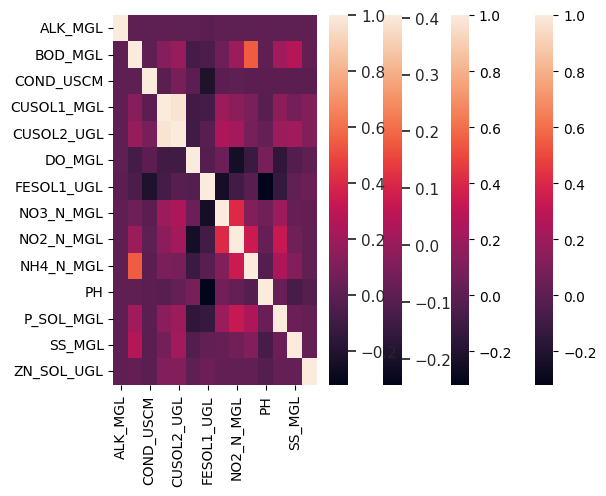

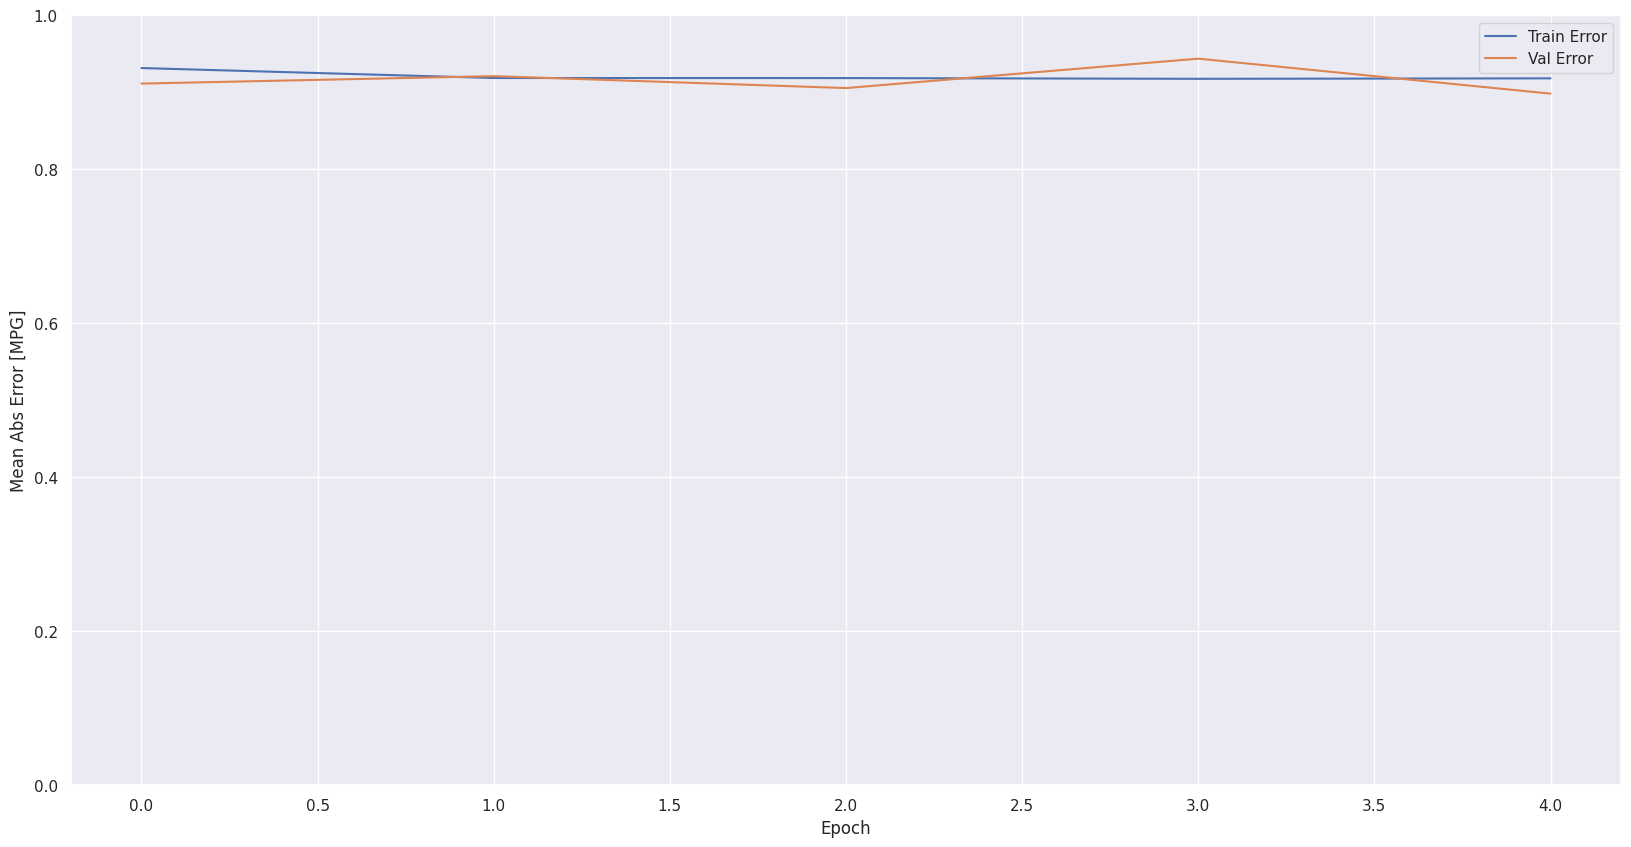

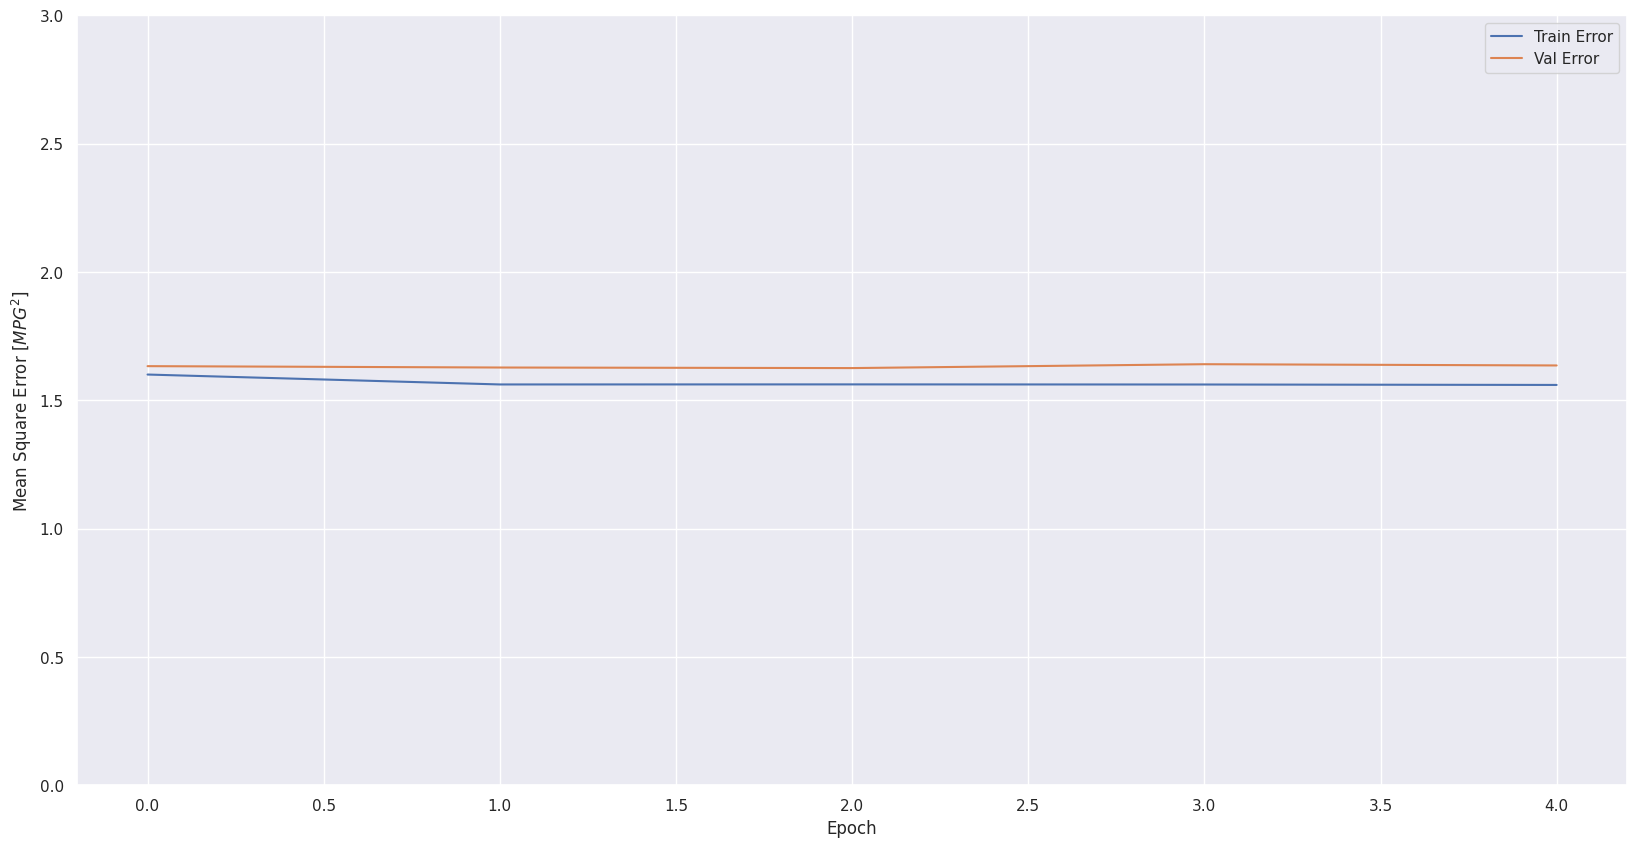

In [46]:
sns.set(rc = {'figure.figsize':(20,10)})
plot_history(history)

In [47]:
print("Val eval", model.evaluate(X_val, y_val))

print("Test eval", model.evaluate(X_test, y_test))

print(model.predict(X_val))

print(y_val)

model.save("model.h5")

364/364 [==============================] - 1s 3ms/step - loss: 1.6356 - mae: 0.8982 - mse: 1.6356
Val eval [1.635558843612671, 0.8981995582580566, 1.635558843612671]
364/364 [==============================] - 1s 3ms/step - loss: 1.6239 - mae: 0.9125 - mse: 1.6239
Test eval [1.623907208442688, 0.9124507308006287, 1.623907208442688]
364/364 [==============================] - 1s 3ms/step
[[1.4077116]
 [1.3575484]
 [1.3774434]
 ...
 [1.3868904]
 [1.3729142]
 [1.3737506]]
[2.1  0.82 0.05 ... 2.74 0.17 1.55]


In [48]:
model.save("util/saved_model.h5")

/home/ertis/pruebas_antonio/NITRATOS/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

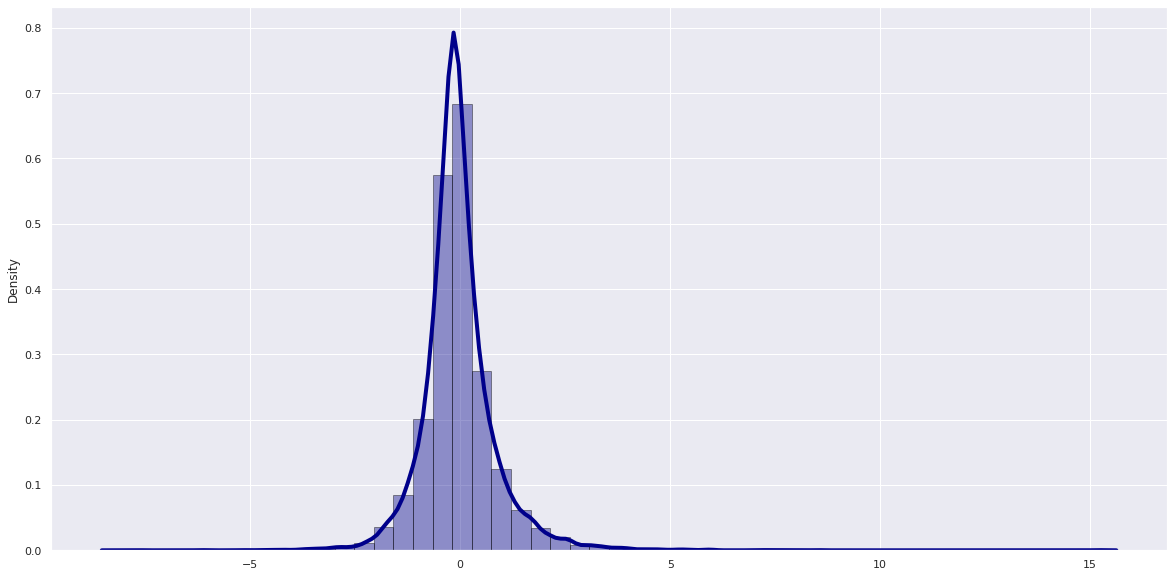

In [124]:
test_predictions = model.predict(X_test)

error = y_test - test_predictions.flatten()

sns.distplot(x=error.flatten(), kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

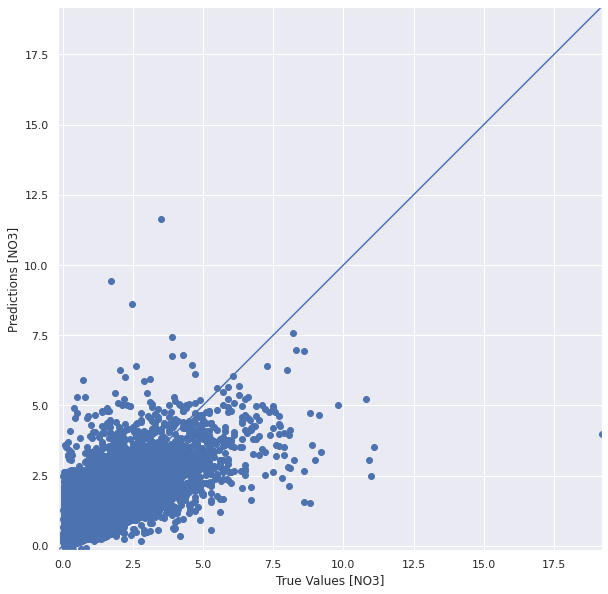

In [125]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions.flatten())
plt.xlabel('True Values [NO3]')
plt.ylabel('Predictions [NO3]')
lims = [min(min(y_test), min(test_predictions.flatten())),
        max(max(y_test), max(test_predictions.flatten()))]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [126]:
len(X_test)

11298

In [142]:
real_vals = y_test
pred_vals = test_predictions.flatten()

zipped_lists = zip(real_vals, pred_vals)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
real_vals, pred_vals = [ list(tuple) for tuple in  tuples]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-0.1598803997039795, 19.2)

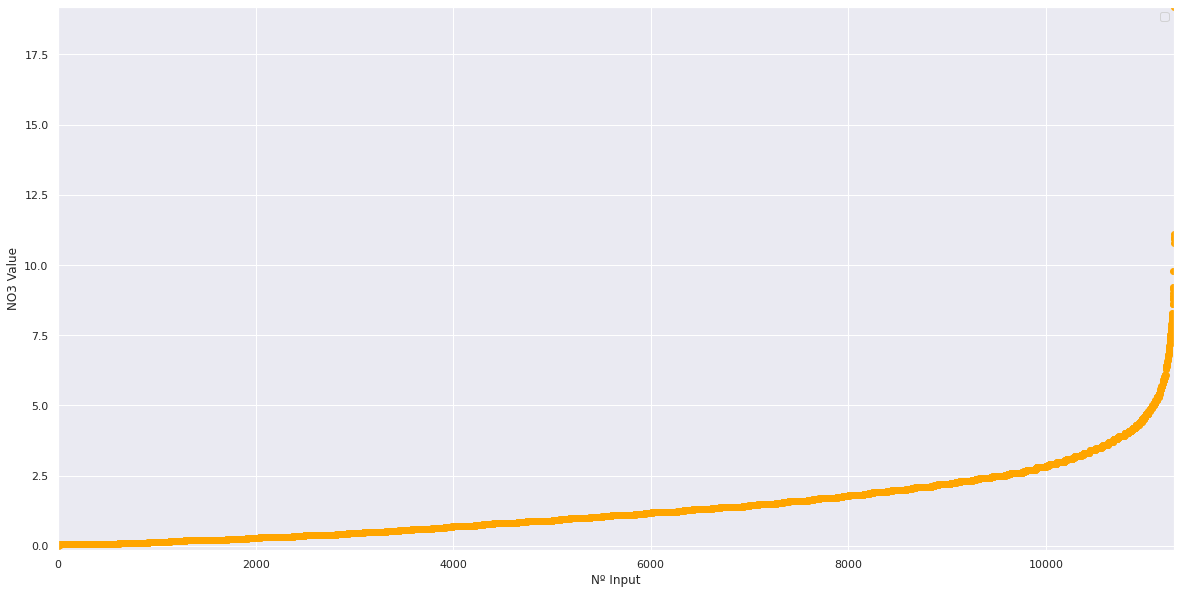

In [143]:
a = plt.axes()
s1 = plt.scatter(range(len(real_vals)), real_vals, c="orange")
plt.legend()
plt.xlabel('Nº Input')
plt.ylabel('NO3 Value')
xlims = [0,len(pred_vals)]
ylims = [min(min(real_vals), min(pred_vals)),
        max(max(real_vals), max(pred_vals))]
plt.xlim(xlims)
plt.ylim(ylims)
# plt.legend((s1, s2), ('Real', 'Predicted'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-0.1598803997039795, 19.2)

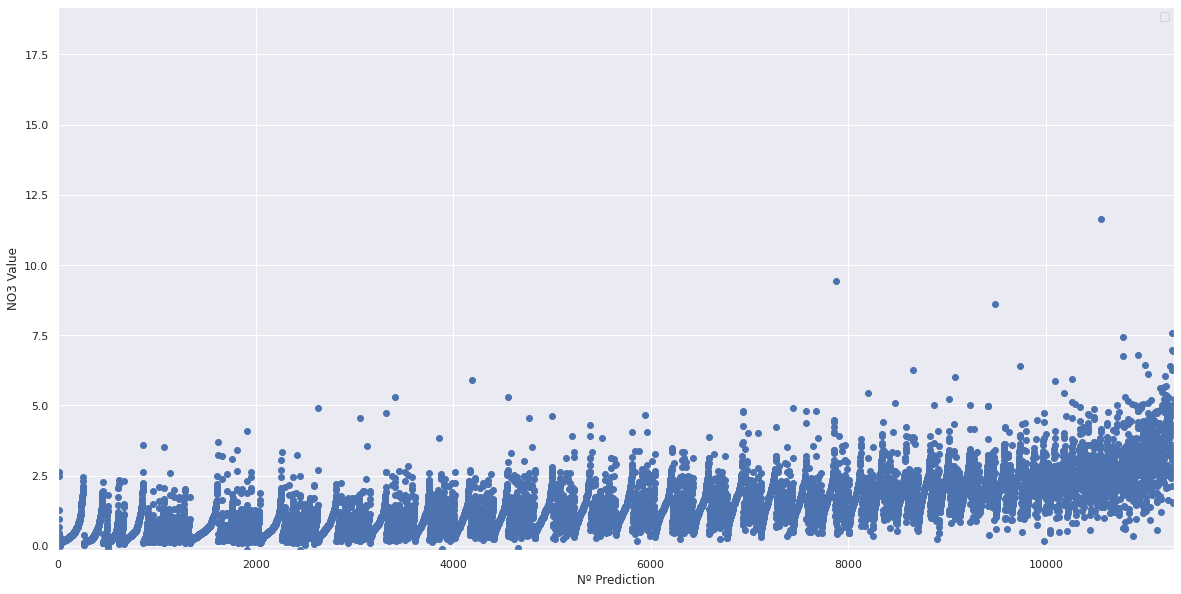

In [144]:
a = plt.axes()
s2 = plt.scatter(range(len(pred_vals)), pred_vals)
plt.legend()
plt.xlabel('Nº Prediction')
plt.ylabel('NO3 Value')
xlims = [0,len(pred_vals)]
ylims = [min(min(real_vals), min(pred_vals)),
        max(max(real_vals), max(pred_vals))]
plt.xlim(xlims)
plt.ylim(ylims)
# plt.legend((s1, s2), ('Real', 'Predicted'))